In [16]:
# Importamos algunas de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
data_viajes_linea = pd.read_csv('cancelaciones_año_tipo_linea.csv', delimiter=';')
print(data_viajes_linea.shape)
print("Dataset por Linea + Tipo Pasaje. Es raro que no aparezca el número de línea, no?")
data_viajes_linea.head()

(433, 3)
Dataset por Linea + Tipo Pasaje. Es raro que no aparezca el número de línea, no?


,anio,TipoPasaje,TOTAL
0,2019,624,1182
1,2019,863-TARIFA RESIDENTE ISLEÑO,2016
2,2019,ATRIBUTO SOCIAL,372644074
3,2019,ESCOLAR INICIAL Y PRIMARIO CABA,1089157
4,2019,ESCOLAR PRIMARIO BSAS,6599082


In [26]:
#Datos de viajes por empresa y tipo de pasaje
data_viajes_empresa = pd.read_csv('cancelaciones_año_tipo_empresa.csv', delimiter=';')
print(data_viajes_empresa.shape)
print("WARNING: Es raro que no aparezca el nombre de la empresa, no?")
data_viajes_empresa.tail(15)

(433, 3)


,anio,TipoPasaje,TOTAL
418,2018,ESCOLAR,13982010
419,2018,ESCOLAR INICIAL Y PRIMARIO CABA,3051904
420,2018,ESCOLAR PRIMARIO BSAS,17406029
421,2018,ESCOLAR SECUNDARIO BSAS,35316883
422,2018,ESCOLAR SECUNDARIO CABA,14483089
423,2018,NORMAL,2782086368
424,2017,-,3732485
425,2017,ATRIBUTO SOCIAL,1102073859
426,2017,ESCOLAR,15642311
427,2017,NORMAL,2860748301


In [27]:
#Dataset de viajes por año por empresa simplemente, sin tipo de pasaje
data_viajes_empresa2 = pd.read_csv('cancelaciones_año_empresa.csv', delimiter=';')
print(data_viajes_empresa2.shape)
print("Acá sí aparece el nombre de la empresa; perdemos tipo de pasaje. Pero me quedaría con este")
data_viajes_empresa2.tail(15)

(802, 3)
Acá sí aparece el nombre de la empresa; perdemos tipo de pasaje. Pero me quedaría con este


,anio,EMPRESA,TOTAL
787,2016,TRATADO DEL PILAR S.R.L.,4536461
788,2016,TTES.AUTOMOTORES DE PASAJEROS SIGLO XXI SA,1391723
789,2016,UNION PLATENSE S.R.L,32093242
790,2016,UNION PLATENSE SRL,6190651
791,2016,UNION TRANSITORIA COSA CIA TRANSPORTE VECINAL U.T,5761751
792,2016,UNION TRANSPORTISTAS DE EMPRESAS S.A.,7235304
793,2016,UNION TRANSPORTISTAS DE EMPRESAS SA,1429730
794,2016,UTENOR LINEA 722 UNION TRANSITORIA DE EMPRESAS,1892861
795,2016,UTENOR LINEA 723 UNION TRANSITORIA DE EMPRESAS,991294
796,2016,UTENOR SA L 722,417765


In [28]:
data_viajes_empresa2['anio'].unique()

array([2019, 2018, 2017, 2016])

In [29]:
#Dataset de viajes por año por línea simplemente, sin tipo de pasaje
data_viajes_linea2 = pd.read_csv('cancelaciones_año_linea.csv', delimiter=';')
print(data_viajes_linea2.shape)
print("Acá sí aparece el número de línea; perdemos tipo de pasaje")
data_viajes_linea2.tail(15)

(1683, 3)
Acá sí aparece el número de línea; perdemos tipo de pasaje


,anio,LINEA,TOTAL
1668,2016,LINEA 97,5440671
1669,2016,LINEA 98,24313613
1670,2016,LINEA 99,5340605
1671,2016,LINEA A,55144693
1672,2016,LINEA B,80397484
1673,2016,LINEA C,44660901
1674,2016,LINEA D,77629581
1675,2016,LINEA E,19912240
1676,2016,LINEA H,16963461
1677,2016,LINEA OESTE,20132156


In [6]:
data_subsidiosCD=pd.read_csv('aportes_colectivoscd.csv', delimiter=';')
print(data_subsidiosCD.shape)
print("Dataset Colectivos de Corta Distancia. Están mal asignados los nombres de las columnas :S")
data_subsidiosCD.tail()

(59332, 6)
Dataset Colectivos de Corta Distancia. Están mal asignados los nombres de las columnas :S


,mes,provincia,municipio,cuit,tipo,monto
59327,01/2017,30-71248519-8,TUCUMAN,SAN MIGUEL DE TUCUMAN,3177529.22,Comp. Tarifaria
59328,01/2017,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2894401.81,Comp. Tarifaria
59329,01/2017,33-54565229-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,434695.65,Comp. Gasoil
59330,01/2017,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,431681.69,Comp. Gasoil
59331,01/2017,33-70799632-9,TUCUMAN,SAN MIGUEL DE TUCUMAN,2714843.56,Comp. Tarifaria


In [ ]:
#Deberíamos filtrar por C.A.B.A.
data_subsidiosCD['cuit'].unique()

In [13]:
data_subsidiosCD_CABA=data_subsidiosCD.loc[data_subsidiosCD.cuit=='C.A.B.A.']
print(data_subsidiosCD_CABA.shape)
data_subsidiosCD_CABA.head()

(9972, 6)


,mes,provincia,municipio,cuit,tipo,monto
284,05/2019,20-06956154-4,C.A.B.A.,C.A.B.A.,0.0,Comp. Gasoil
285,05/2019,20-07815485-4,C.A.B.A.,C.A.B.A.,0.0,Comp. Gasoil
286,05/2019,20-08140678-3,C.A.B.A.,C.A.B.A.,0.0,Comp. Gasoil
287,05/2019,20-13164214-9,C.A.B.A.,C.A.B.A.,0.0,Comp. Gasoil
288,05/2019,30-51755171-2,C.A.B.A.,C.A.B.A.,0.0,Comp. Gasoil


In [19]:
#WARNING: Tenemos pocos meses para los subsidios!
data_subsidiosCD_CABA['mes'].unique()

array(['05/2019', '03/2019', '12/2018', '12/2017', '03/2017'],
      dtype=object)

In [18]:
subisidiosCD_tipo = pd.pivot_table(data_subsidiosCD_CABA,values = 'tipo',columns = 'monto', index = data_subsidiosCD_CABA.mes.values, aggfunc = np.sum)
subisidiosCD_tipo

monto,Comp. Gasoil,Comp. Tarifaria
03/2017,0.0,NaN
03/2019,0.0,NaN
05/2019,245104000.0,5.284987e+08
12/2017,NaN,9.231846e+06
12/2018,0.0,0.000000e+00


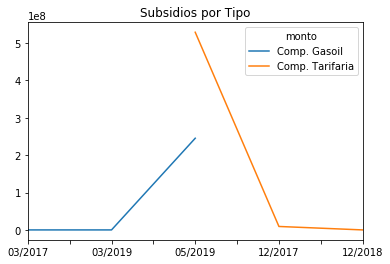

In [21]:
subisidiosCD_tipo.plot(title = "Subsidios por Tipo")

In [14]:
data_subsidiosCD_CABA.drop_duplicates(subset='provincia', inplace=True,keep='first')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# Me tira un error 
# ¿Habría que cambiar la / por - para que aplique la función que aprendimos?
data_subsidiosCD_CABA.mes=pd.to_datetime(data_subsidiosCD_CABA.mes)

In [30]:
#Acá estoy intentando agrupar los datos por CUIT pero no parece funcionar porque me trae la columna mes primero
data_subsidiosCD_CABA2=data_subsidiosCD_CABA.groupby('provincia')
data_subsidiosCD_CABA2.head()

,mes,provincia,municipio,cuit,tipo,monto
284,05/2019,20-06956154-4,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
285,05/2019,20-07815485-4,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
286,05/2019,20-08140678-3,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
287,05/2019,20-13164214-9,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
288,05/2019,30-51755171-2,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
289,05/2019,30-52276217-9,C.A.B.A.,C.A.B.A.,14750000.00,Comp. Gasoil
291,05/2019,30-53313348-3,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
292,05/2019,30-54342507-5,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
293,05/2019,30-54408966-4,C.A.B.A.,C.A.B.A.,0.00,Comp. Gasoil
294,05/2019,30-54563704-5,C.A.B.A.,C.A.B.A.,5660000.00,Comp. Gasoil


In [ ]:
#Data de subsidios Larga Distancia
data_subsidiosLD=pd.read_csv('aportes_colectivosld.csv', delimiter=';')
print(data_subsidiosLD.shape)
print("Dataset Colectivos de Larga Distancia. Están mal asignados los nombres de las columnas :S")
data_subsidiosLD.tail()

In [9]:
data_sistau=pd.read_csv('sistau_rcc.csv', delimiter=';')
print(data_sistau.shape)
print("Dataset SISTAU")
data_sistau.tail()

(32481, 7)
Dataset SISTAU


,mes,provincia,municipio,cuit,razon_social,pago,monto
32476,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 1,2526323.36
32477,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 2,0.00
32478,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 3,495657.49
32479,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 4,242066.22
32480,06/2017,JN,JN,33-70223426-9,NUDO SA,RCC SD PAGO 5,9521376.52


In [ ]:
#Este Dataset no pude abrirlo tampoco; pero sí lo consulté en la web. Resulta que una empresa puede tener varias líneas
#Ej: NUDO tiene las líneas 107, 6 y 851
#Por ende, vamos a tener un obstáculo en identificar qué línea precisa recibió cuánto subsidio. Sólo podemos saberlo a nivel empresa
data_lineas=pd.read_csv('lineas.csv', delimiter=';')
print(data_lineas.shape)
print("Dataset Lineas")
data_lineas.tail()

In [ ]:
data_sistau.groupby('cuit')